# Informationen aus Datensätzen gewinnen
<font size="4">In diesem JupyterNotbook werden aus zwei vorhandenen Datensätzen zu Film Bewertungen unterschiedliche Informationen gewonnen, die für einen Anwender von Interesse sein könnten.


In [1]:
import pandas as pd
import numpy as np
import numpy.matlib as mnp
import matplotlib.pyplot as plt
import re
from datetime import datetime
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets


## 1. Daten einlesen
<font size="4"> Einlesen der gegebenen Dataframes.
    
    Der Dataframe "ratings" enthält die Informationen über die "userId" des Nutzers, die Bewertung "rating", den Zeitpunkt der Bewertung "timestamp" und dem Film mit der "movieId".
    
    Der Dataframe "movies" enthält die Informationen über die "movieId" des Films, den Titel des Films und die Genres die dem Film zugeordnet wurden.
    
    Aus diesen Daten können nun durch Bearbeitung der Dataframes Informationen gewonnen werden wie z.B. die Durchschnittsbewertung von Film xy, oder wie viele Filme im Jahr xy erschienen sind und vieles mehr.

In [2]:
ratings = pd.read_csv("ratings.csv", sep = ",")
movies = pd.read_csv("movies.csv", sep = ",")

In [3]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


## 2. Definieren der Interacts
<font size="4"> Dieses JupyterNotebook soll interaktiv genutzt werden können, daher werden im Folgenden die benötigten Interacts definiert.

In [5]:
style = {'description_width': 'initial'}
genres = widgets.Dropdown(
    options=['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Action', 'Crime', 'Thriller', 'Mystery', 'Horror',
       'Drama', 'War', 'Western', 'Sci-Fi', 'Musical', 'Film-Noir',
       'IMAX', 'Documentary', '(no genres listed)'],
    description= 'Für welches Genre möchten Sie Informationen?',
    style =style,
    layout = Layout(width='50%')
)

flop_num = widgets.IntSlider(
    value=7,
    min=3,
    max=20,
    step=1,
    description='Geben Sie die Rankinganzahl an Flop Filmen an, die ausgegeben werden sollen.',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style =style,
    layout = Layout(width='80%')
)

rating_num = widgets.IntSlider(
    value=7,
    min=1,
    max=329,
    step=1,
    description='Wie viele Bewertungen sollen die Filme mindestens erhalten?',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style =style,
    layout = Layout(width='80%')
)


genre1 = widgets.Dropdown(
    options=['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Action', 'Crime', 'Thriller', 'Mystery', 'Horror',
       'Drama', 'War', 'Western', 'Sci-Fi', 'Musical', 'Film-Noir',
       'IMAX', 'Documentary', '(no genres listed)'],
    #value=2,
    description='Für welches Genre möchten Sie Informationen?',
    style =style,
    layout = Layout(width='50%')
)

genre2 = widgets.Dropdown(
    options=['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Action', 'Crime', 'Thriller', 'Mystery', 'Horror',
       'Drama', 'War', 'Western', 'Sci-Fi', 'Musical', 'Film-Noir',
       'IMAX', 'Documentary', '(no genres listed)'],
    #value=2,
    description='Für welches Genre möchten Sie Informationen?',
    style =style,
    layout = Layout(width='50%')
)

Jahr = widgets.IntSlider(
    value=1950,
    min=1902,
    max=2018,
    step=1,
    description='Geben Sie das Jahr an auf das die Ausgabe Beschränkt werden soll?',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style =style,
    layout = Layout(width='80%')
)

movie_id= widgets.Text(
    placeholder='FilmId',
    description='Geben Sie eine FilmId ein:',
    disabled=False,
    style =style,
    layout = Layout(width='50%')
)



top_num = widgets.IntSlider(
    value=7,
    min=3,
    max=20,
    step=1,
    description='Geben Sie die Rankinganzahl an Top Filmen an, die ausgegeben werden sollen.',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style =style,
    layout = Layout(width='80%')
)

jahr_oder_alles = widgets.Dropdown(
    options=[('Für ein bestimmtes Jahr',True), ('Alle Jahre',False)],
    description='Möchten Sie die Ergebnisse für alle Jahre oder für ein bestimmtes?',
    style =style,
    layout = Layout(width='75%')
)


## 3. Anpassungen der Datensätze
 <font size="4"> Im Folgenden werden Funktionen geschrieben, die Inhalte aus dem Dataframe zur besseren Verarbeitung umwandeln. Außerdem werden beide Dataframes zu einem kombiniert.

### Extrahieren der Erscheinungsjahre aus den Titeln
 <font size="3"> In dem Dataframe "movies" sind die Titel und das Erscheinungsjahr des Films im gleichen Eintrag gespeichert. Zur späteren Nutzung kann das Jahr als solches hilfreich sein, um z.B. herauszufinden wieviele Filme in einem Jahr erschienen sind. Deshalb wird eine Funktion benötigt, die das Erscheinungsjahr aus dem Titel extrahiert. Da es Titel der Form "Titel (Jahr)" und "Titel (Jahr) " (Leerzeichen am Ende) gibt müssen beide Fälle berücksichtigt werden um alle Jahre entsprechend rauslesen zu können.

In [6]:
def extract_year(title):
    year = np.NAN
    
    if title.endswith(')'):
        year = title[-5:-1]
    elif title.endswith(' '):
        year = title[-6:-2]
    else:
        year = np.NAN
        
    return float(year)

### Umwandeln der timestamps
<font size="3"> In dem Dataframe "ratings" sind die Zeitpunkte der abgegebenen Bewertungen in timestamps angegeben. Die folgende Funktion wandelt diese in lesbare Daten um.

In [7]:
def to_datetime(timestamp):
    '''
    Funktion, die die timestamps in lesbare Daten (Tag, Monat, Jahr) umwandelt.
    '''
    
    dt_object = datetime.fromtimestamp(timestamp)

    return dt_object

### Zusammenführen der Dataframes zu einem und Anwenden der beiden oberen Funktionen

<font size="3"> Erst werden beide Dataframes anhand des gleichen Eintrags 'movieId' zusammengefügt.
    
<font size="3">Daraufhin wird für jedes Genre eines Films einen Eintrag für diesen Film geschafft, um später Informationen zu einzelnen Genres zu gewinnen. 
    
<font size="3">Schlussendlich werden die zwei eben definierten Funktionen 'extract_year' und 'timestamp' auf die entsprechenden Einträge angewandt.

In [8]:
def merge_movie_ratings(movies,ratings):
    
    # es gibt 9742 filme in movies
    
    # es gibt 9724 Filme mit Bewertung in ratings und movie_ratings -> 18 Filme ohne Bewertung
    
    # 9719 Filme wenn doppelnamen nicht beachtet werden 
    
    movie_ratings = pd.merge(ratings, movies, how='inner')
    
    # trennt an | und macht für jedes genre eine Zeile mit den identischen Einträgen
    movie_ratings = movie_ratings.assign(genres=movie_ratings.genres.str.split("|")).explode('genres')

    movie_ratings['year'] = movie_ratings['title'].apply(extract_year)
    
    movie_ratings['timestamp'] = movie_ratings['timestamp'].apply(to_datetime)
    
    return movie_ratings
movie_ratings = merge_movie_ratings(movies, ratings)

### 4. Anzahl der Filme in einem Genre und die Durchschnittsbewertung

<font size="3"> Für jedes Filmgenre soll die Anzahl der Filme, sowie die durchschnittliche
 Bewertung ausgegeben werden können. Dazu müssen folgende Schritte durchgeführt werden:
    
    1. Entfernen aller "unnötigen" Attribute für das hier gewählte Ziel
    2. Suchen nach Duplikaten
    3. Zählen der Filme die dem gesuchten Genre zugeordnet sind
    4. Berechnen der Durchschnittsbewertung dieses Genres
    5. Mit Interact zum gewählten Genre ausgeben

In [9]:
def anzahlgenre(movie_ratings, genre):
    
    num_in_genre_df = movie_ratings.drop(columns = ['userId', 'timestamp', 'title', 'year'])

    # gibt Dataframe in dem jeder film nur einmal mit seinen genres genannt ist
    num_in_genre_df = num_in_genre_df.drop_duplicates(subset = ['movieId','genres'])
    
    # gibt die Anzahl an Filmen in den jeweligen Genres
    num_in_genre_df = num_in_genre_df['genres'].value_counts()
    
    # Den Eintrag in num_in_genre_df suchen der zum eingegebenen Genre gehört
    num_in_genre = num_in_genre_df[genre]
    
    # Berechnet nach einer Grupierung in Genres die Durchschnitte aller anderen Spalten
    average_rating_df = movie_ratings.groupby(by='genres').mean()
    
    # Sucht aus dem Vorherigen Dataframe das Rating vom eingegebenen Genre
    average_rating = average_rating_df['rating'][genre]
    
    print(f'Das Filmgenre {genre} hat {num_in_genre} Filme und ist durchschnittlich mit {average_rating:.3f} von 5 Punkten bewertet.')

    return 

interact(anzahlgenre, movie_ratings = fixed(movie_ratings), genre = genres)


interactive(children=(Dropdown(description='Für welches Genre möchten Sie Informationen?', layout=Layout(width…

<function __main__.anzahlgenre(movie_ratings, genre)>

### 5. Ausgabe der 3 bis 20 schlechtesten Filme

<font size="3"> Die/Der Nutzer:in bekommt nach Eingabe von X ∈ [3, 20] ein Ranking der 
   Flop-X Filme ausgegeben (d. h. die X Filme mit den niedrigsten 
   Durchschnittsbewertungen). Dabei soll es auch möglich sein die Mindestanzahl
   an Bewertungen die ein Film haben muss um in die Flop-X aufgenommen zu 
   werden zu bestimmen.
    
    1. Zusammenfügen der Anzahl an Bewertungen für jeden Film mit dem 'movies' Dataframe 
    2. 'rating' Dataframe auf die wichtigen Attribute reduzieren
    3. Durchschnittsbewertungen berechnen
    4. Zusammenfügen der zwei neuen Dataframes und Sortieren der Durchschnittsbewertungen
    5. Rauswerfen der Einträge, die nicht genug Bewertungen haben
    6. Mit Interact die entsprechenden x Flop Filme ausgeben

In [10]:
def flop(movies,ratings,flop_num,rating_num):
    
    # Gibt Dataframe mit den anzahl an Bewertungen der jeweligen Filme
    num_ratings = pd.merge(ratings['movieId'].value_counts(),movies, left_index=True, right_on='movieId').rename(columns={'movieId_x':'num_rating'}).drop(columns=['movieId_y'])    
    
    ratings = ratings.drop(columns = ['userId', 'timestamp'])
    
    # Berechnet nach einer Grupierung in movieId die Durchschnitte aller anderen Spalten
    mean_ratings = ratings.groupby(by = 'movieId', as_index = False).mean()
    
    # Zusammenfügen der DataFrames movies und mean_rating anhand der Spalte movieId und sortieren nach den Bewertungen
    mean_ratings = (pd.merge(movies, mean_ratings)).sort_values('rating')
    
    # Anzahl der Bewertungen hinzufügen
    ratings = pd.merge(mean_ratings,num_ratings)
    
    # Alle Filme rausschmeisen, die nicht genug Bewertungen haben 
    ratings_neu = ratings[ratings['num_rating'] >= int(rating_num)]
    
    # Ausgeben des gewünschten Intervalls
    flop_x = ratings_neu[0:int(flop_num)]
    
    print(f'Die {flop_num} schlechtesten Filme mit mindestens {rating_num} Bewertungen sind:')
    print(flop_x['title'])
    
    return

interact(flop, movies = fixed(movies), ratings = fixed(ratings),flop_num = flop_num,rating_num = rating_num)



interactive(children=(IntSlider(value=7, continuous_update=False, description='Geben Sie die Rankinganzahl an …

<function __main__.flop(movies, ratings, flop_num, rating_num)>

### 6. Vergleich zweier Genres

<font size="3"> Die/Der Nutzerin soll zwei Genres auswählen und dann jeweils ein Histogramm der
durchschnittlichen Filmbewertungen angezeigt bekommen.
Zusätzlich soll es möglich sein das Histogramm auf Filme aus einem bestimmten 
Jahr einzuschränken.
    
    1. Reduzieren des Dataframes 'movie_ratings' auf das Nötigste 
    2. Prüfen ob ein Jahr angegeben wurde, falls nein alle Jahre ausgeben, falls ja den Dataframe auf diese reduzieren
    3. zwei Dataframes erstellen. Eins für jedes gewählte Genre. Anzahl der Bewertungen zu einem Rating. 
    4. Relative Häufigkeit der Genres zu den Bewertungen berechnen.
    5. Mit Interact das entsprechende Histogramm ausgeben

In [11]:
def hist(movie_ratings, genre1, genre2, single_year, Jahr ):
    
    hist_df = movie_ratings.drop(columns = ['userId', 'timestamp', 'title'])
   
    #if isinstance(Jahr, int):
    
    if single_year:
        hist_df = hist_df[hist_df['year'] == Jahr] 
    
    # Gibt die Anzahl an Bewertungen zu einer Bewertungsklasse für ein Genre
    hist_df_genre1 = pd.DataFrame(hist_df[hist_df['genres'] == genre1]['rating'].value_counts())
    hist_df_genre2 = pd.DataFrame(hist_df[hist_df['genres'] == genre2]['rating'].value_counts())

    # Fügt die relative Häufigkeit der Bewertungklasse hinzu
    hist_df_genre1['relHäuf'] = hist_df_genre1['rating'].transform(lambda x : x/x.sum())*100
    hist_df_genre2['relHäuf'] = hist_df_genre2['rating'].transform(lambda x : x/x.sum())*100
    
    plt.figure(dpi=600)
    plt.bar(np.array(hist_df_genre1.index)+0.1, hist_df_genre1['relHäuf'], width=0.2)
    plt.bar(np.array(hist_df_genre2.index)-0.1, hist_df_genre2['relHäuf'], width=0.2)
    plt.xlabel('Durchschnittliche Bewertung')
    plt.ylabel('relative Häufigkeit')
    plt.xticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5],label ='Durchschnittliche Bewertung')
    plt.legend([genre1,genre2])
    
    return 



interact(hist, movie_ratings = fixed(movie_ratings), genre1 = genre1, genre2 = genre2, single_year = jahr_oder_alles, Jahr = Jahr)


interactive(children=(Dropdown(description='Für welches Genre möchten Sie Informationen?', layout=Layout(width…

<function __main__.hist(movie_ratings, genre1, genre2, single_year, Jahr)>

### 7. Ausgabe der durchschnittlichen Bewertung eines Films und der zeitliche Verlauf der Bewertungen

<font size="3"> Die/Der Nutzer:in soll eine Film-ID eingeben können, woraufhin 
die Anzahl der abgegebenen/erhaltenen Bewertungen und die 
Durchschnittsbewertung für diese Film-ID ausgegeben werden sollen. Zusätzlich 
soll der zeitliche Verlauf der Film-Bewertungen geplottet werden. 
    
    1. Umwandeln der eingegebenen 'movieId' in einen Integer 
    2. Den Dataframe 'ratings' auf die eingegeben 'movieId' reduzieren
    3. Berechnen der Durchschnittsbewertung dieses Films.
    4. Umwandeln der 'timestamps' in Daten (Jahr, Monat, Tag, ...) zum späteren plotten
    5. Plotten des Zeitlichen Verlaufs der Bewertungen
    6. Mit Interact die entsprechenden Daten und den Plot ausgeben.

In [12]:
def film(ratings, movie_id):
    if not movie_id:
        print("Keine FilmId eingegeben!")
        return
    
    movie_id = int(movie_id)

    #reduziert den 'ratings' DataFrame auf die Bewertungen zu der eingegebenen movie_id
    df_film = ratings[(ratings['movieId'] == movie_id)].copy()
    
    #Anzahl an Bewertungen für den Film
    num_ratings = df_film.shape[0]

    #Berechnung der Durchschnittlichen Bewertung des Films
    average_rating = df_film['rating'].mean()

    print(f'Für den Film wurden {num_ratings} Bewertungen abgegeben. Der Film erreicht eine durchschnittliche Bewertung von {average_rating}')

    df_film['timestamp'] = df_film['timestamp'].apply(to_datetime)

    #Sortieren der Daten zum Plotten
    df_film =df_film.sort_values(by = 'timestamp')

    timestamps = np.array(df_film['timestamp'])
    #average_rating = np.array (average_rating)
    rating = np.array(df_film['rating'])
    
    plt.figure(dpi=600)
    plt.plot(timestamps, rating)
    plt.xlabel('Jahr')
    plt.ylabel('Bewertung')
    plt.xticks( rotation=90, fontsize = 8)
    

    return
interact(film, ratings = fixed(ratings), movie_id = movie_id)

interactive(children=(Text(value='', description='Geben Sie eine FilmId ein:', layout=Layout(width='50%'), pla…

<function __main__.film(ratings, movie_id)>

### 8. Ausgabe der 3 bis 20 besten Filme

<font size="3"> Die/Der Nutzer:in bekommt nach Eingabe von X ∈ [3, 20] ein Ranking der 
   Top-X Filme ausgegeben (d. h. die X Filme mit den höchsten
   Durchschnittsbewertungen). Dabei soll es auch möglich sein die Mindestanzahl
   an Bewertungen die ein Film haben muss um in die Top-X aufgenommen zu 
   werden zu bestimmen.
    
    1. Zusammenfügen der Anzahl an Bewertungen für jeden Film mit dem 'movies' Dataframe 
    2. 'rating' Dataframe auf die wichtigen Attribute reduzieren
    3. Durchschnittsbewertungen berechnen
    4. Zusammenfügen der zwei neuen Dataframes und Sortieren der Durchschnittsbewertungen
    5. Mit Interact die entsprechenden x Top Filme ausgeben

In [13]:
def top(movies, ratings,top_num,rating_num):
    # Analog zu den Flopfilmen -> Sortierung muss jedoch beachtet werden
    num_ratings = pd.merge(ratings['movieId'].value_counts(),movies, left_index=True, right_on='movieId').rename(columns={'movieId_x':'num_rating'}).drop(columns=['movieId_y'])    
    
    ratings = ratings.drop(columns = ['userId', 'timestamp'])
    
    mean_ratings = ratings.groupby(by = 'movieId', as_index = False).mean()
    
    mean_ratings = (pd.merge(movies, mean_ratings)).sort_values('rating', ascending = False )
    
    ratings = pd.merge(mean_ratings,num_ratings)
    
    ratings_neu = ratings[ratings['num_rating'] >= int(rating_num)]
    
    top_x = ratings_neu[0:top_num]
    
    print(f'Die {top_num} besten Filme mit mindestens {rating_num} Bewertungen sind:')
    print(top_x['title'])
    
    return

interact(top, movies = fixed(movies), ratings = fixed(ratings),top_num = top_num,rating_num = rating_num)



interactive(children=(IntSlider(value=7, continuous_update=False, description='Geben Sie die Rankinganzahl an …

<function __main__.top(movies, ratings, top_num, rating_num)>

### 9. Plotten der Anzahl an produzierten Filme über die Jahre

<font size="3"> Die/Der Nutzer:in bekommt eine Übersicht über die Anzahl an produzierten Filme über die Jahre 1902 bis 2018.
    
    1. Anzahl der produziereten Filme berechnen 
    2. Plotten

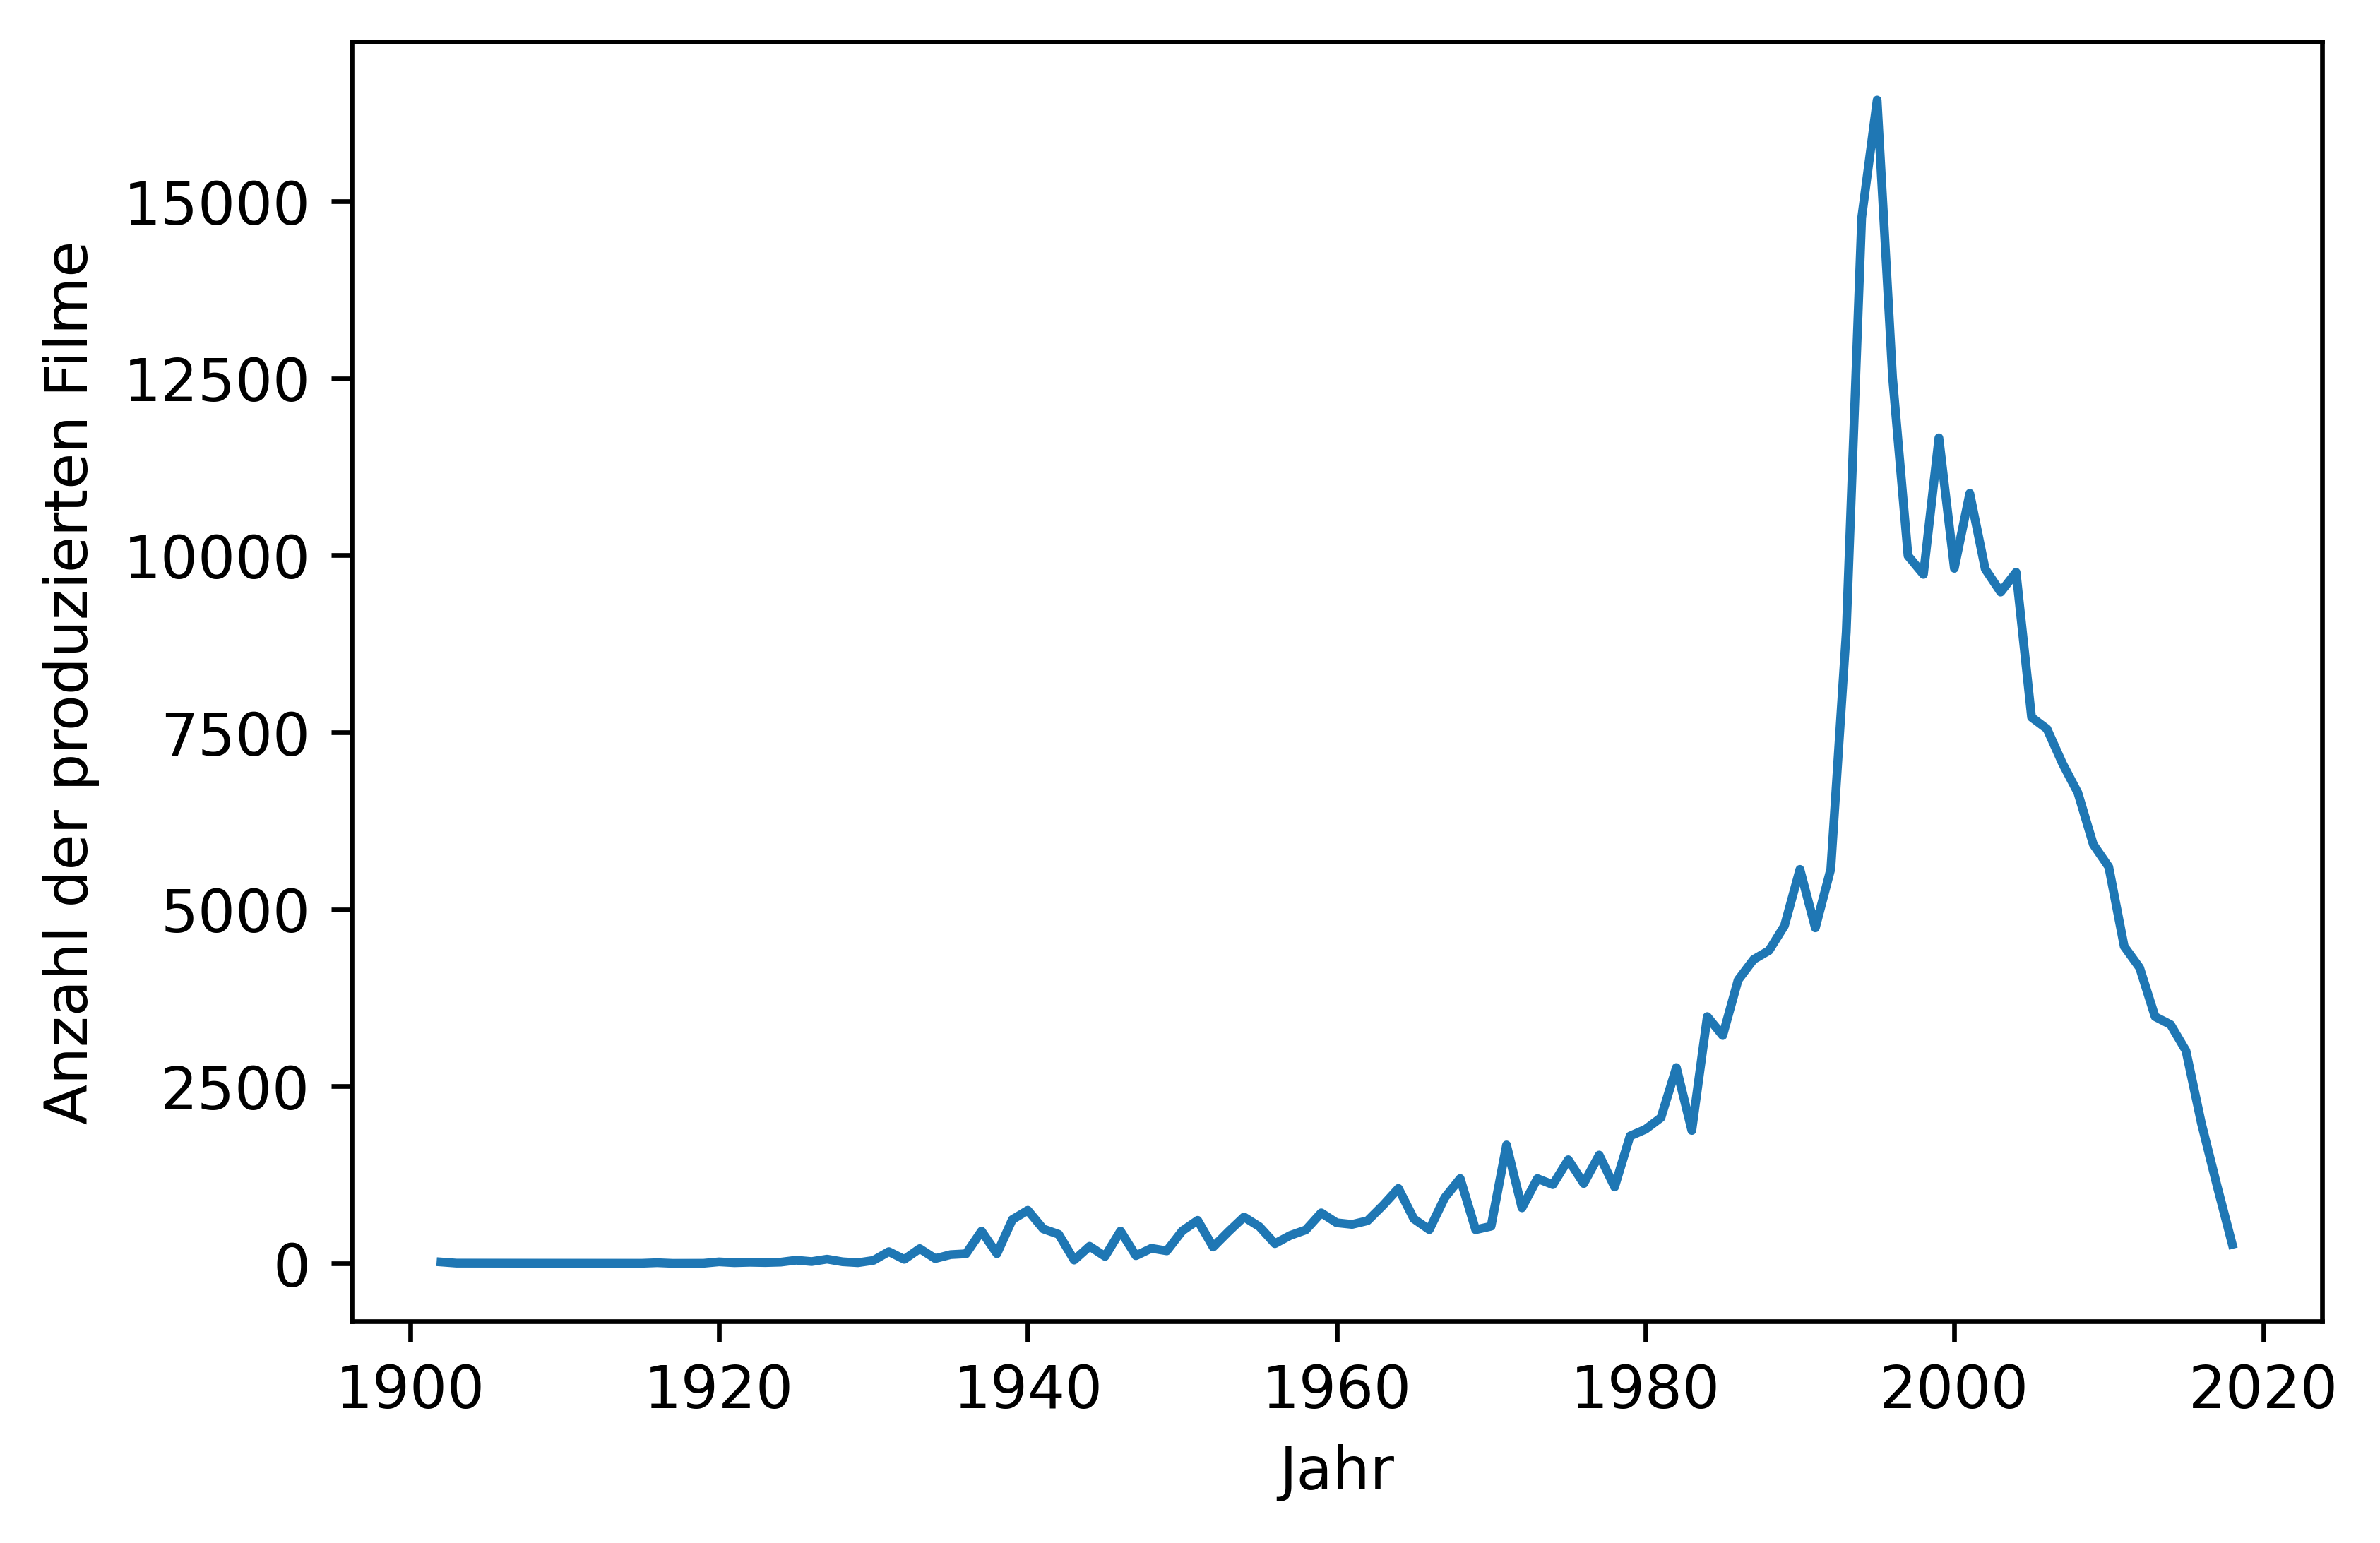

In [14]:
def film_prod():
    film_prod = (movie_ratings[["year", "movieId"]].groupby("year").count())
    plt.figure(dpi=600)
    plt.plot(film_prod)
    plt.xlabel('Jahr')
    plt.ylabel('Anzahl der produzierten Filme')
    plt.show()
    return
film_prod()
    

### 10. Plotten der Anzahl an abgegebenen Bewertungen über die Jahre

<font size="3"> Die/Der Nutzer:in bekommt eine Übersicht über die Anzahl an abgegebenen Bewertungen über die Jahre 1902 bis 2018.
    
    1. Anzahl der abgegebenen Bewertungen berechnen 
    2. Plotten

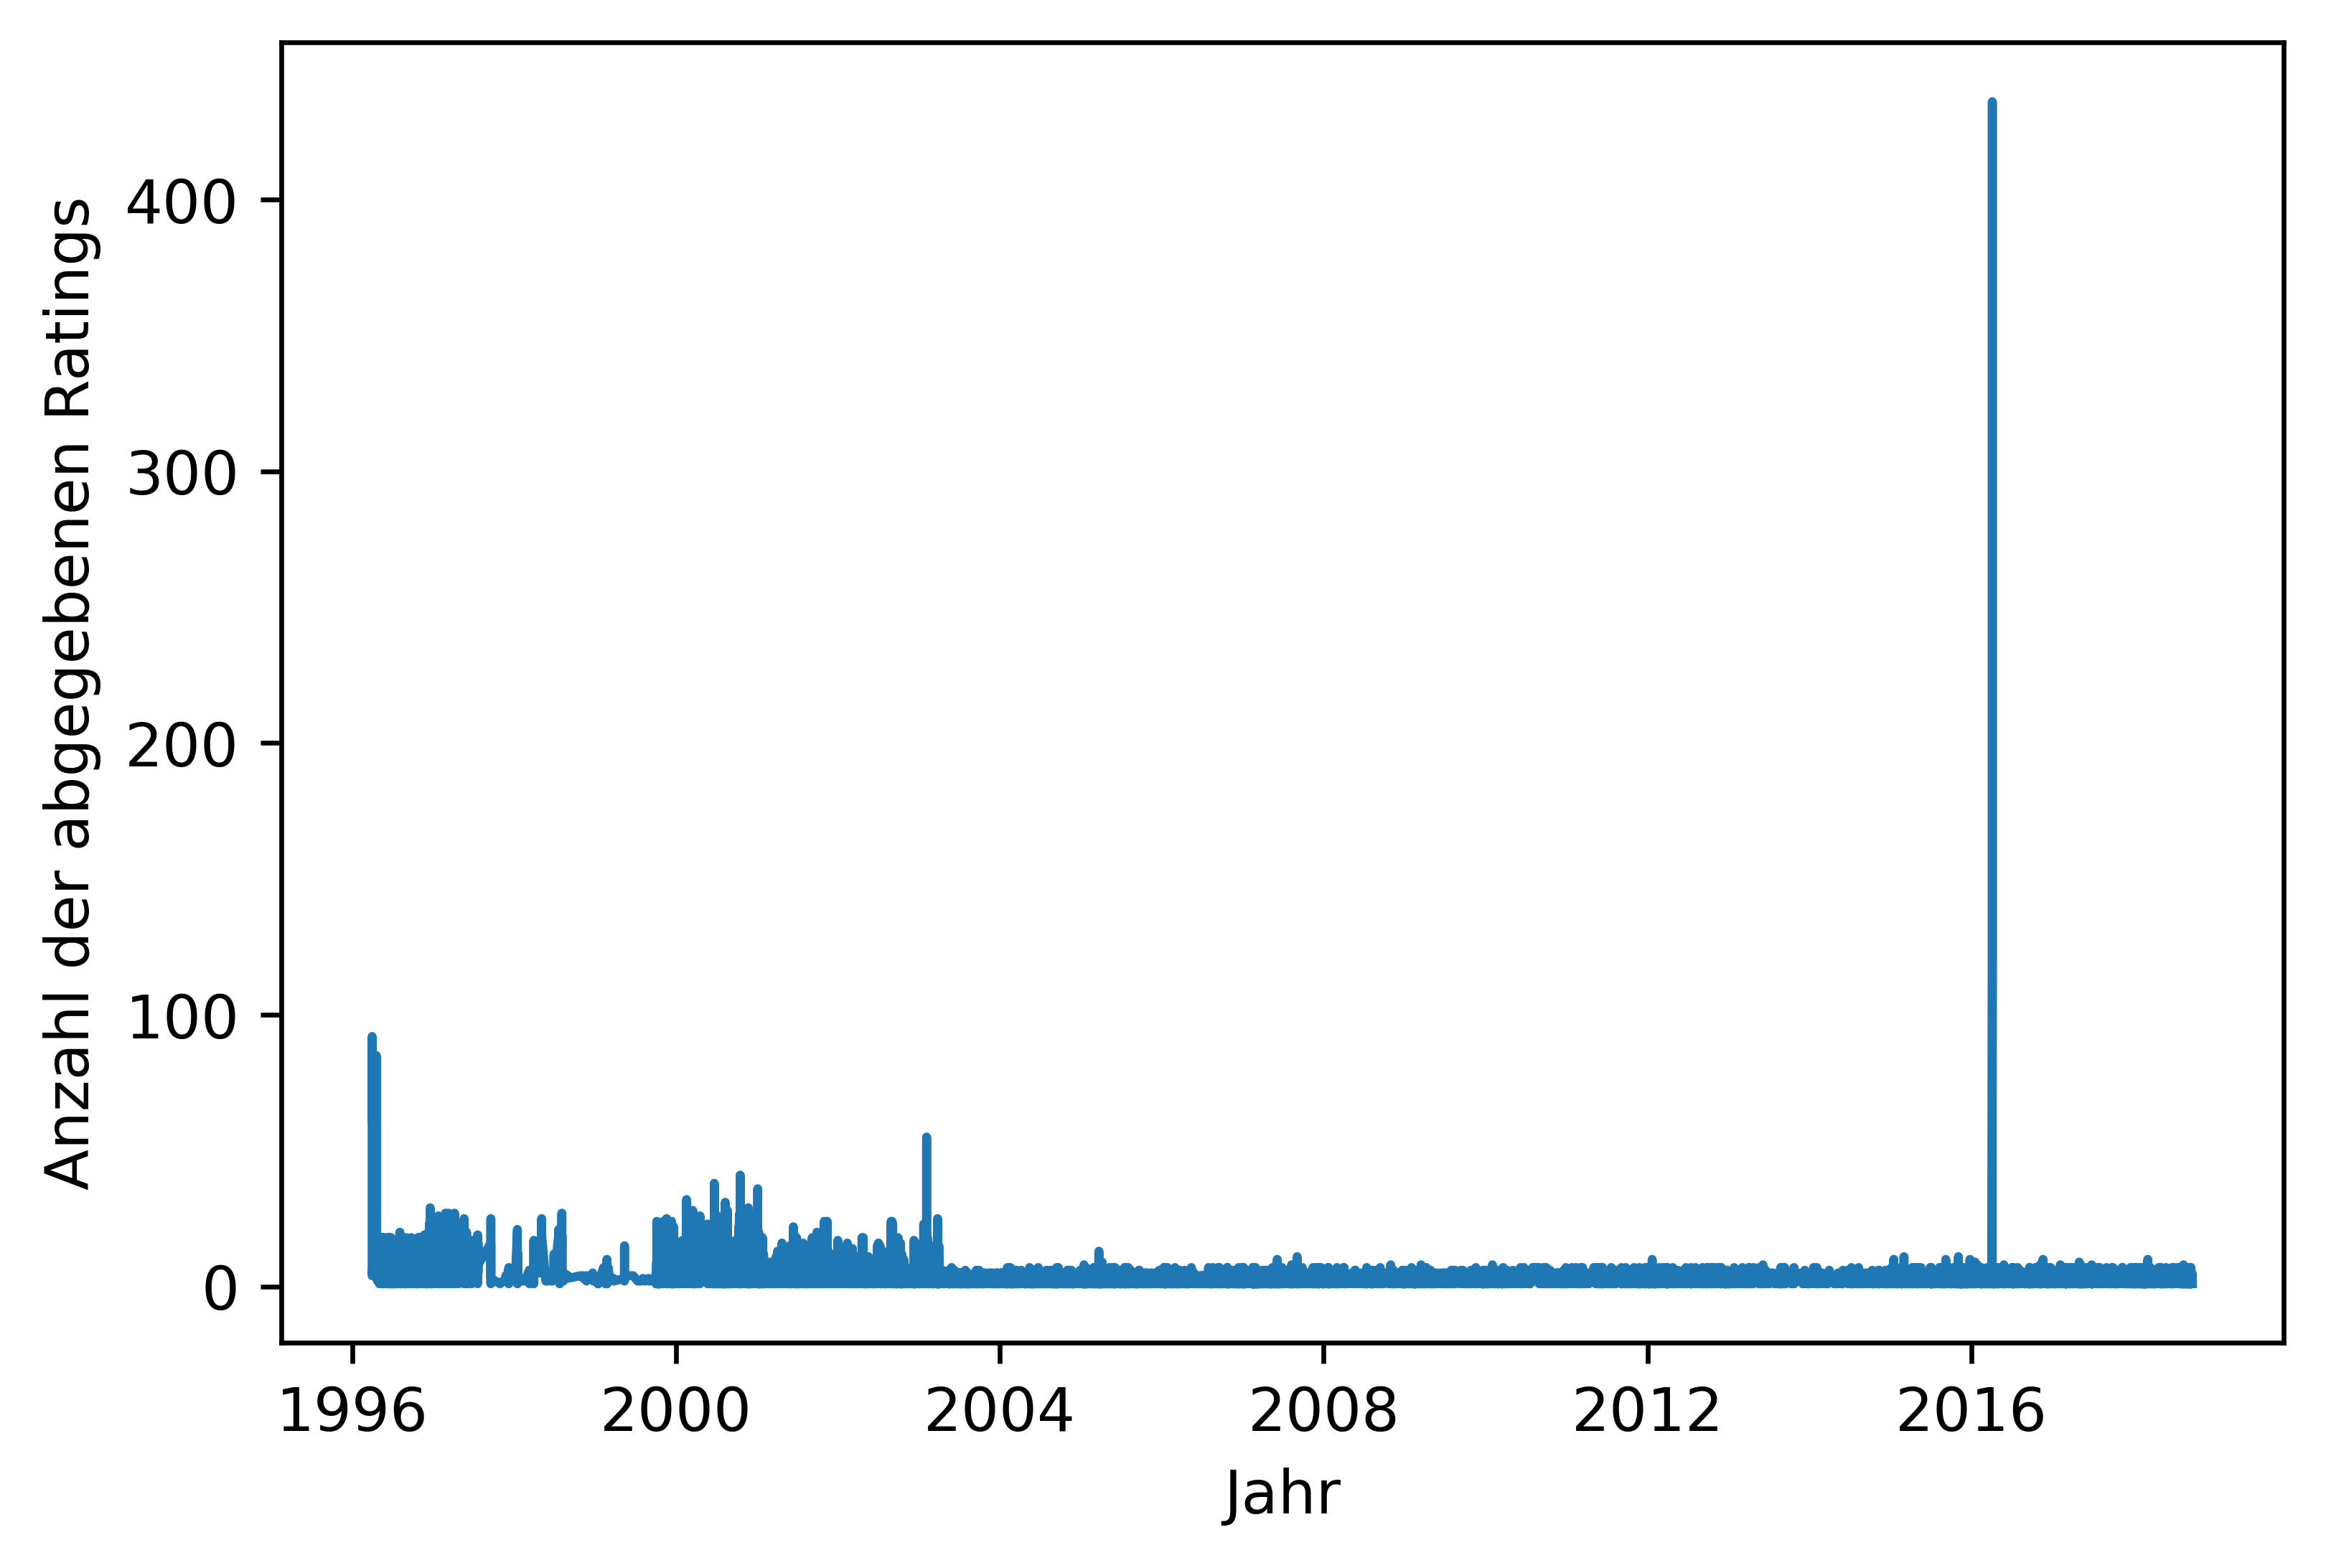

In [15]:
def num_ratings():
    num_ratings = (movie_ratings[["timestamp", "userId"]].groupby("timestamp").count())
    plt.figure(dpi=600)
    plt.plot(num_ratings)
    plt.xlabel('Jahr')
    plt.ylabel('Anzahl der abgegebenen Ratings')
    plt.show()
    return
num_ratings()
